# Módulos gerais

In [470]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as m
import statsmodels.api as sm
import seaborn as sns
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from matplotlib.pyplot import figure

Base

In [471]:
df = pd.read_csv('desepesa_2018_2024.csv', encoding='latin1', sep=';')

In [472]:
df.shape

(518886, 42)

In [473]:
df.columns

Index(['ANO', 'PODER', 'UO', 'DESCRICAO_UO', 'UG', 'DESCRICAO_UG', 'FUNCAO', 'DESCRICAO_FUNCAO', 'SUB_FUNCAO', 'DESCRICAO_SUB_FUNCAO', 'PROGRAMA', 'PROGRAMA_DESCRICAO', 'PROJETO', 'PROJETO_DESCRICAO', 'PT', 'PT_DESCRICAO', 'FONTE_MAE', 'DESCRICAO_FONTE_MAE', 'FONTE', 'DESCRICAO_FONTE', 'NATUREZA1', 'DESCRICAO_NATUREZA1', 'NATUREZA2', 'DESCRICAO_NATUREZA2', 'NATUREZA3', 'DESCRICAO_NATUREZA3', 'NATUREZA4', 'DESCRICAO_NATUREZA4', 'NATUREZA5', 'DESCRICAO_NATUREZA5', 'NATUREZA6', 'DESCRICAO_NATUREZA6', 'NATUREZA', 'DESCRICAO_NATUREZA', 'CODIGO_FAVORECIDO', 'NOME_FAVORECIDO', 'COD_TIPO_LICITACAO', 'TIPO_LICITACAO', 'MES', 'VALOR_EMPENHADO', 'VALOR_LIQUIDADO', 'VALOR_PAGO'], dtype='object')

# FILTROS
Ajuste do DataFrame
### Filtros aplicados:
DESPESA COM PESSOAL E PODER EXECUTIVO

Selecionando as colunas para análise

In [474]:
# Colunas importantes: ANO, MES, UO, UG, FONTE_MAE, NATUREZA, VALOR_EMPENHADO, VALOR_LIQUIDADO, VALOR_PAGO
df_test = df[['ANO', 'MES', 'PODER','UO', 'UG', 'FONTE_MAE', 'NATUREZA3', 'VALOR_EMPENHADO']]

Criação de uma coluna Ano e Mês

In [475]:
df_test['ANO_MES'] = df_test['ANO'].astype(str) + '-' + df_test['MES'].astype(str)

/tmp/ipykernel_6373/469094189.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['ANO_MES'] = df_test['ANO'].astype(str) + '-' + df_test['MES'].astype(str)


#### Filtro dos dados!

In [476]:
# UO == 21018, NATURZA3 == 331000000, PODER == 'EXE'
# SEFAZ, DESPESA COM PESSOAL E PODER EXECUTIVO
df_test = df_test[df_test['UO'] == 21018]
df_test = df_test[df_test['NATUREZA3'] == 331000000] # Filtrando a Natureza de Pessoal de Operação
df_test = df_test[df_test['PODER'] == 'EXE'] # Apenas o poder executivo

In [477]:
df_test = df_test.sort_values(by=['ANO', 'MES']).reset_index(drop=True)

In [478]:
df_test.head()

,ANO,MES,PODER,UO,UG,FONTE_MAE,NATUREZA3,VALOR_EMPENHADO,ANO_MES
0,2018,1,EXE,21018,410018,100,331000000,604.88,2018-1
1,2018,1,EXE,21018,410018,100,331000000,659.70,2018-1
2,2018,1,EXE,21018,410018,100,331000000,158270.82,2018-1
3,2018,1,EXE,21018,410018,100,331000000,403250.59,2018-1
4,2018,1,EXE,21018,410018,100,331000000,222855.10,2018-1


In [479]:
# Transformando em 'Object' ANO, MES, PODER, UO, UG, FONTE_MAE, NATUREZA3.
convertendo_obj = ['ANO', 'MES', 'PODER', 'UO', 'UG', 'FONTE_MAE', 'NATUREZA3']
for column in convertendo_obj:
    df_test[column] = df_test[column].astype('object')

In [480]:
# Convertendo para Datetime ANO_MES 
df_test['ANO_MES'] = pd.to_datetime(df_test['ANO_MES'], format='%Y-%m')

In [481]:
df_test_agrupado = df_test.groupby('ANO_MES')['VALOR_EMPENHADO'].sum().reset_index()

In [482]:
dados = df_test_agrupado.copy()

# Análise

In [483]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as m
import seaborn as sns
import statsmodels.api as sm
import scipy
from scipy.stats import boxcox
import statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller

In [484]:
# Formatação para gráficos e tabelas
plt.style.use('ggplot')
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 500 )
pd.set_option('display.width', 1000)

In [485]:
# Formatando os Labels
m.rcParams['axes.labelsize'] = 14
m.rcParams['xtick.labelsize'] = 12
m.rcParams['ytick.labelsize'] = 12
m.rcParams['text.color'] = 'k'

In [486]:
dados_serie = dados.set_index('ANO_MES')

In [487]:
dados_serie.isnull().sum()

VALOR_EMPENHADO    0
dtype: int64

<Axes: xlabel='ANO_MES'>

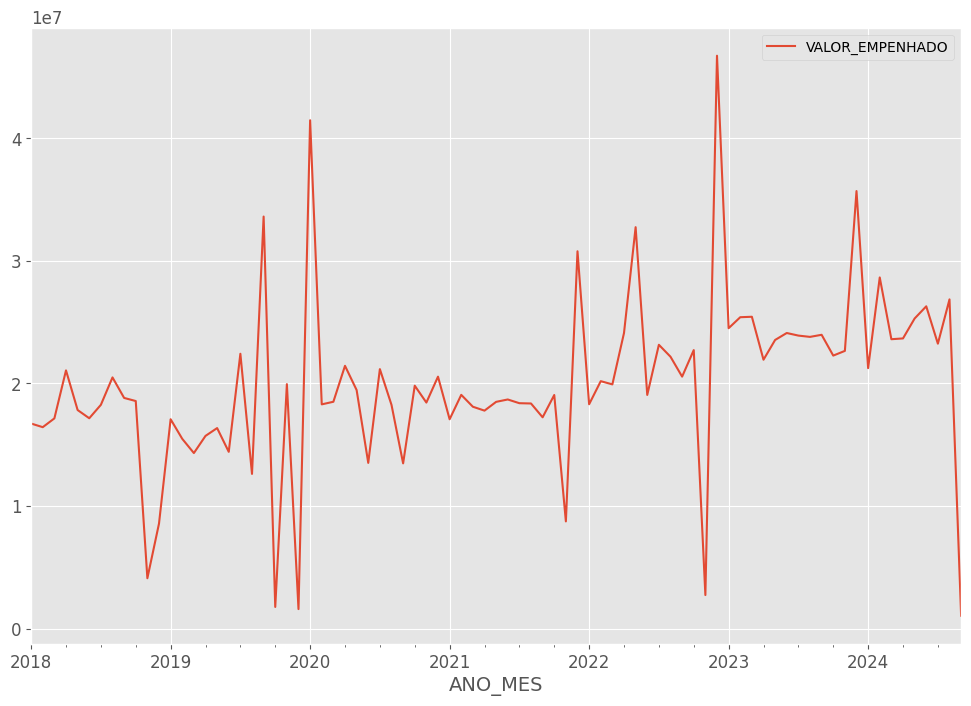

In [488]:
dados_serie.plot(figsize=(12,8))

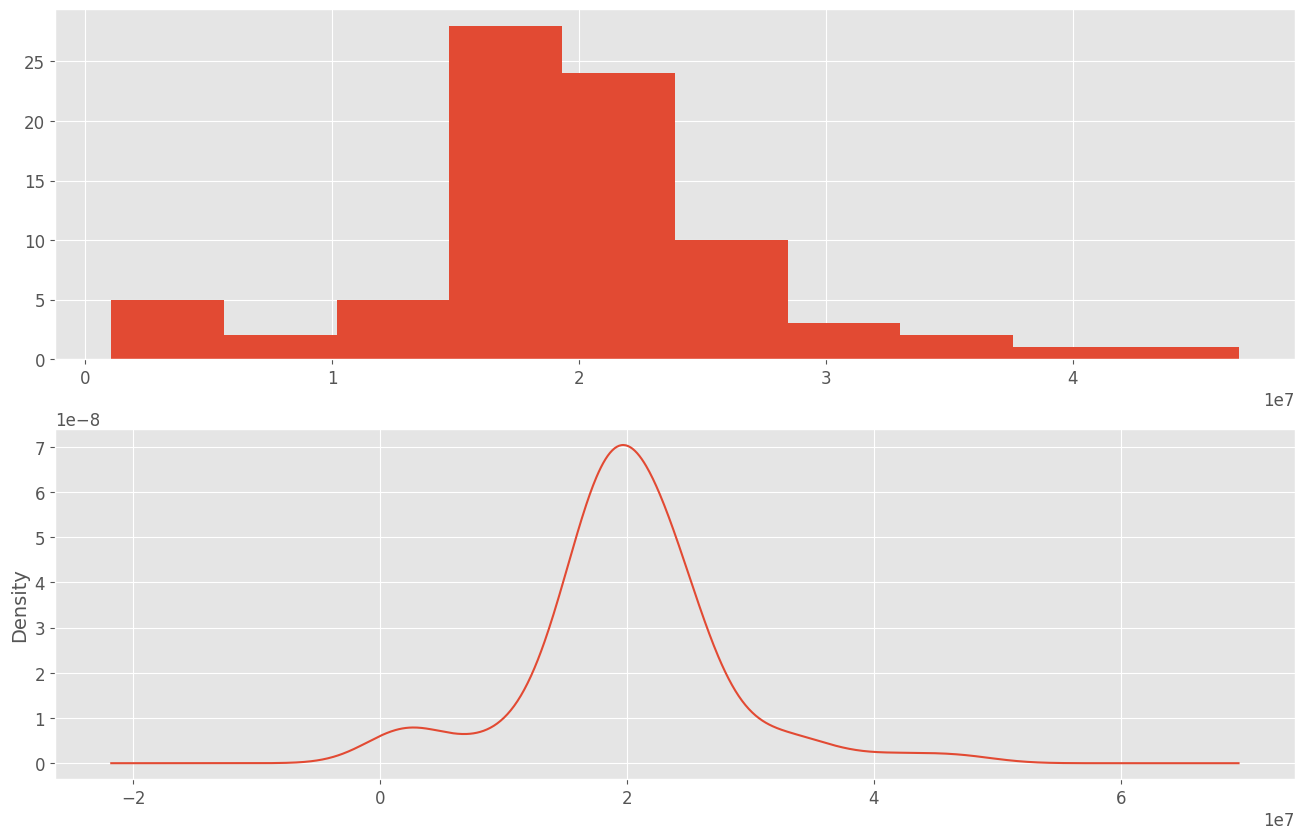

In [489]:
# Gráfico de Densidade
# Plot
plt.figure(1)

# subPlot 1
plt.subplot(211)
dados_serie['VALOR_EMPENHADO'].hist()

# subPLot 2
plt.subplot(212)
dados_serie['VALOR_EMPENHADO'].plot(kind='kde')
plt.show()

Text(0, 0.5, '\nValor Empenhado')

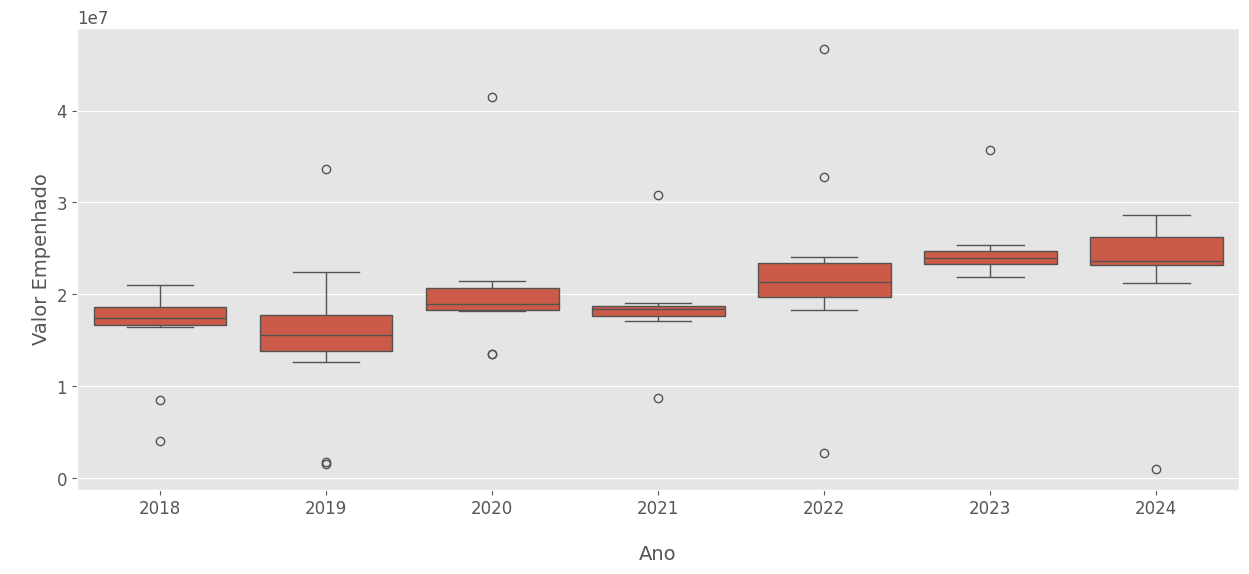

In [490]:
# Define a área de plotagem para os usbplots (os boxplots)
fig, ax = plt.subplots(figsize=(15,6))

# Define as variáveis
indice_ano = dados_serie['VALOR_EMPENHADO'].index.year
valor = dados_serie['VALOR_EMPENHADO']

# Cria um boxplot para cada ano usando o Seaborn
# Observe que estamos extraindo o ano (year) do índice da série
sns.boxplot(x=indice_ano, y=valor, ax=ax, data=dados_serie)

plt.xlabel("\nAno")
plt.ylabel("\nValor Empenhado")

In [491]:
# Decomposição da Série
decomposicao_multiplicativa = sm.tsa.seasonal_decompose(dados_serie,
                                                        model='multiplicative',
                                                        extrapolate_trend='freq')

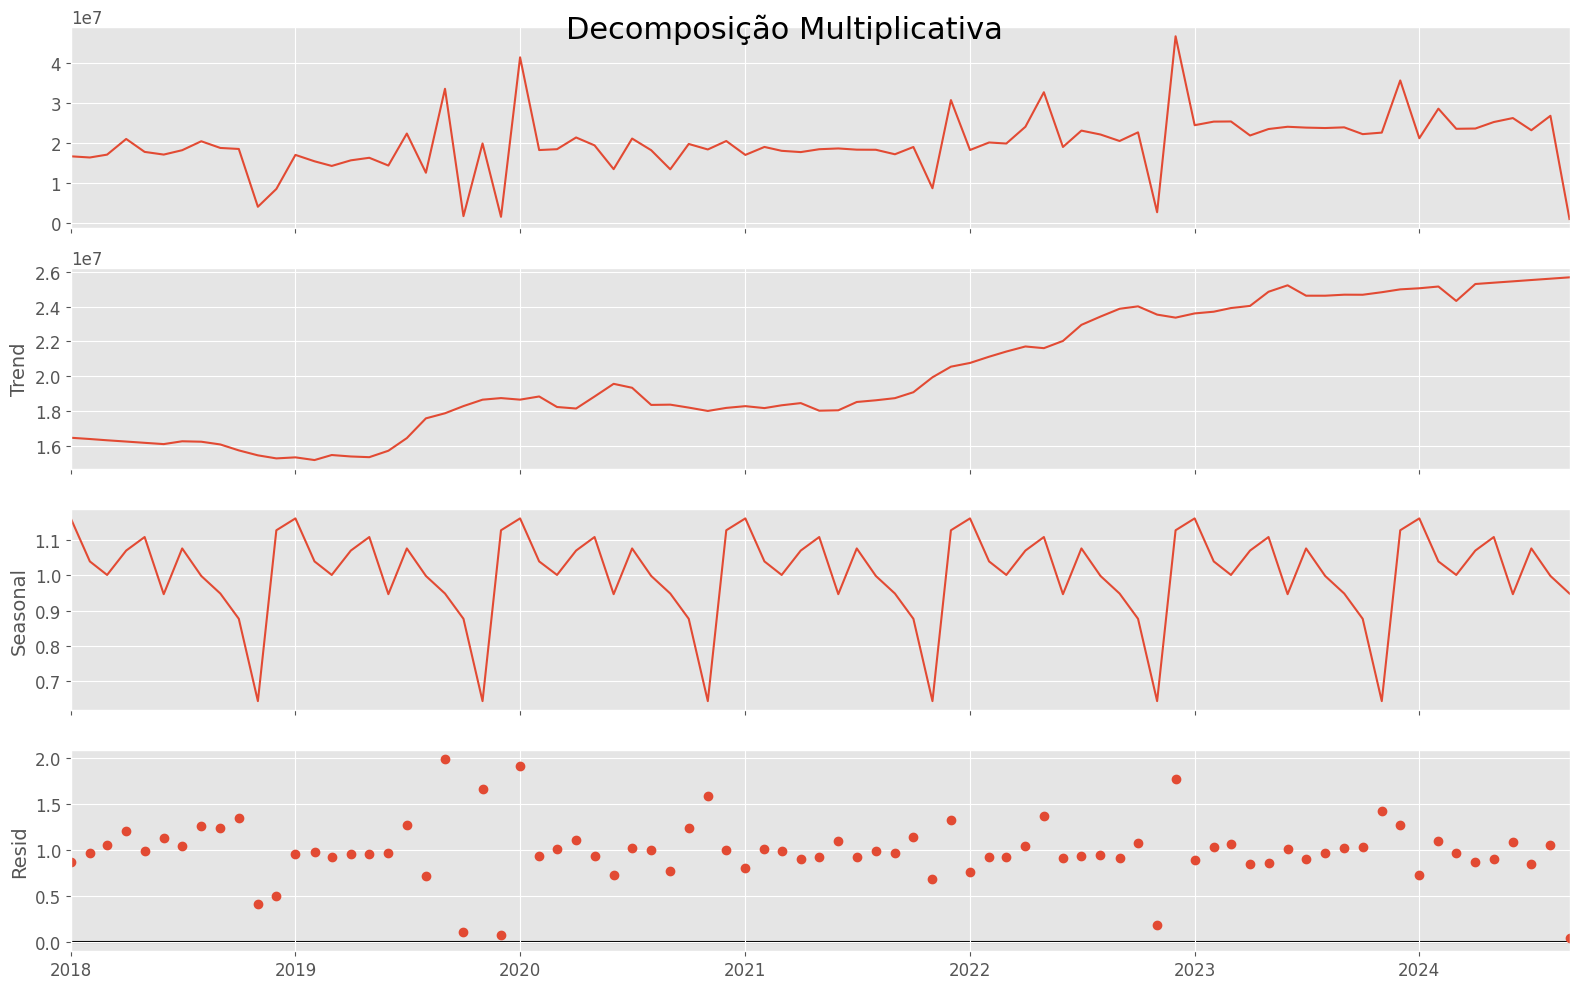

In [492]:
# Plot
plt.rcParams.update({'figure.figsize':(16,10)})
decomposicao_multiplicativa.plot().suptitle("Decomposição Multiplicativa", fontsize=22)
plt.show()

In [493]:
# Decomposição da Série
decomposicao_aditive = sm.tsa.seasonal_decompose(dados_serie,
                                                        model='aditive',
                                                        extrapolate_trend='freq')

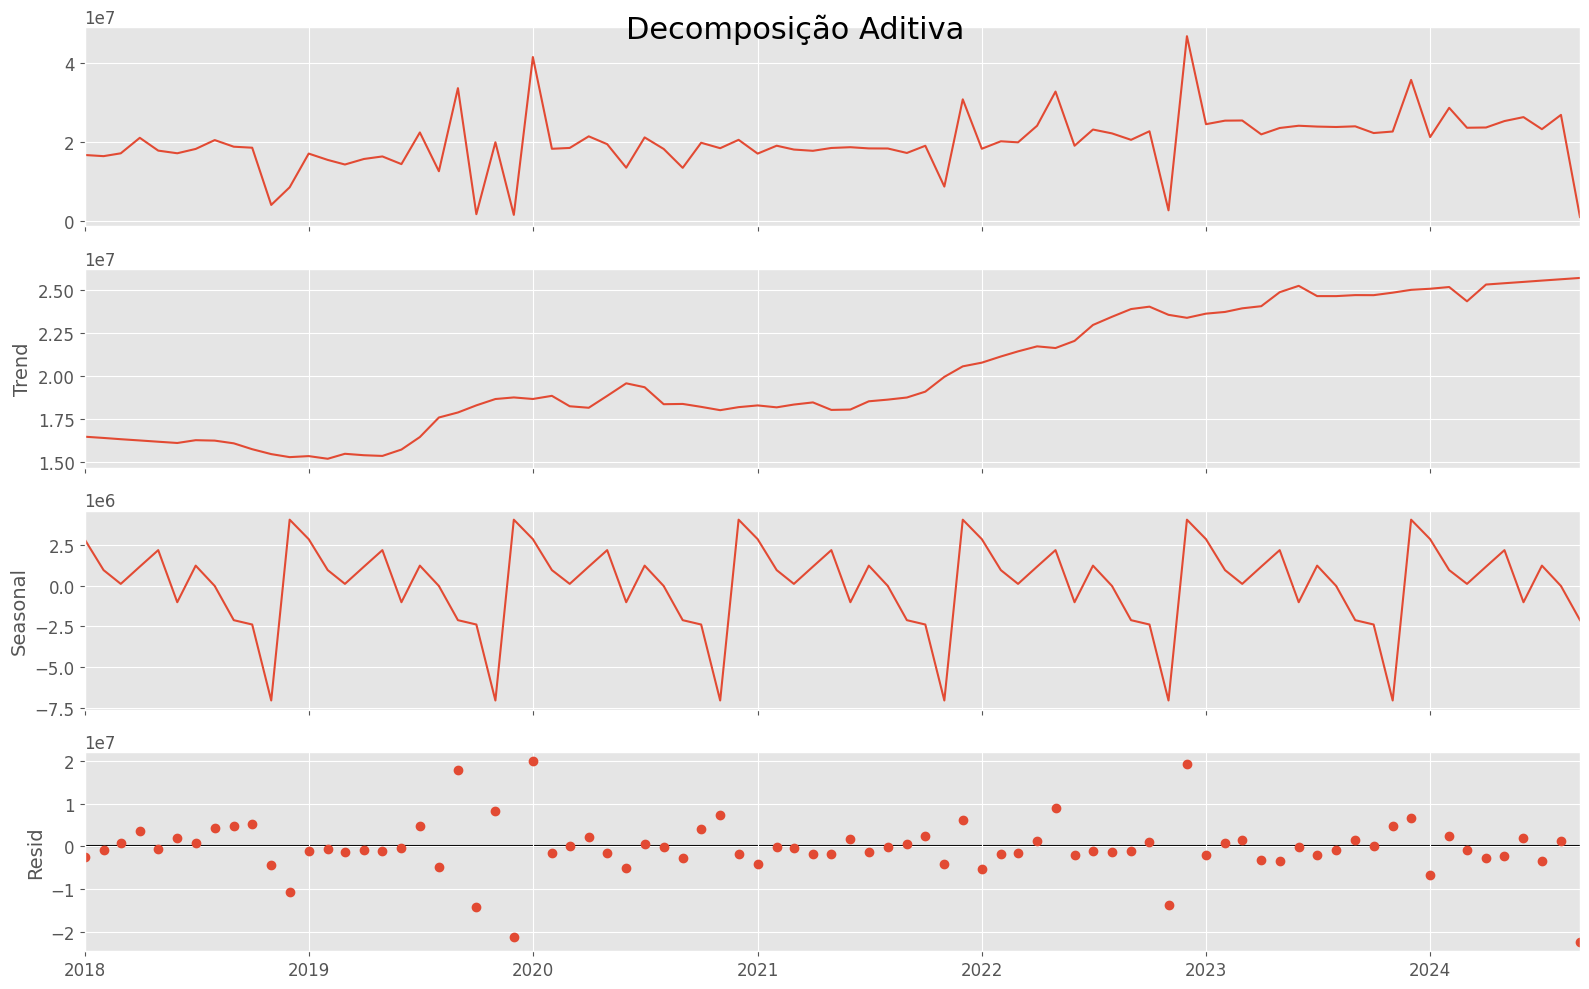

In [494]:
# Plot
plt.rcParams.update({'figure.figsize':(16,10)})
decomposicao_aditive.plot().suptitle("Decomposição Aditiva", fontsize=22)
plt.show()

In [495]:
# Concatena o resultado da decomposição da série
dados_serie_reconstruida = pd.concat([decomposicao_multiplicativa.seasonal, 
                                      decomposicao_multiplicativa.trend, 
                                      decomposicao_multiplicativa.resid, 
                                      decomposicao_multiplicativa.observed], axis = 1)

In [496]:
# Define o nome das colunas
dados_serie_reconstruida.columns = ['Sazonalidade', 'Tendência', 'Resíduos', 'Valores_Observados']

In [497]:
# Mostra o resultado
dados_serie_reconstruida.head()


,Sazonalidade,Tendência,Resíduos,Valores_Observados
ANO_MES,,,,
2018-01-01,1.161445,1.647864e+07,0.873857,16724784.45
2018-02-01,1.039567,1.640567e+07,0.963335,16429479.75
2018-03-01,1.001259,1.633270e+07,1.048432,17145295.26
2018-04-01,1.070290,1.625974e+07,1.210123,21059333.10
2018-05-01,1.108638,1.618677e+07,0.993422,17827216.50


In [498]:
# Dados originais
dados_serie.head()

,VALOR_EMPENHADO
ANO_MES,
2018-01-01,16724784.45
2018-02-01,16429479.75
2018-03-01,17145295.26
2018-04-01,21059333.10
2018-05-01,17827216.50


# Projeto 2

In [499]:
# Determinando estatísticas móveis
rolmean = dados['VALOR_EMPENHADO'].rolling(window = 12).mean()
rolstd = dados['VALOR_EMPENHADO'].rolling(window = 12).std()

In [500]:
# Prepara os dados para o plot
x = dados['ANO_MES'].values
y = dados['VALOR_EMPENHADO'].values

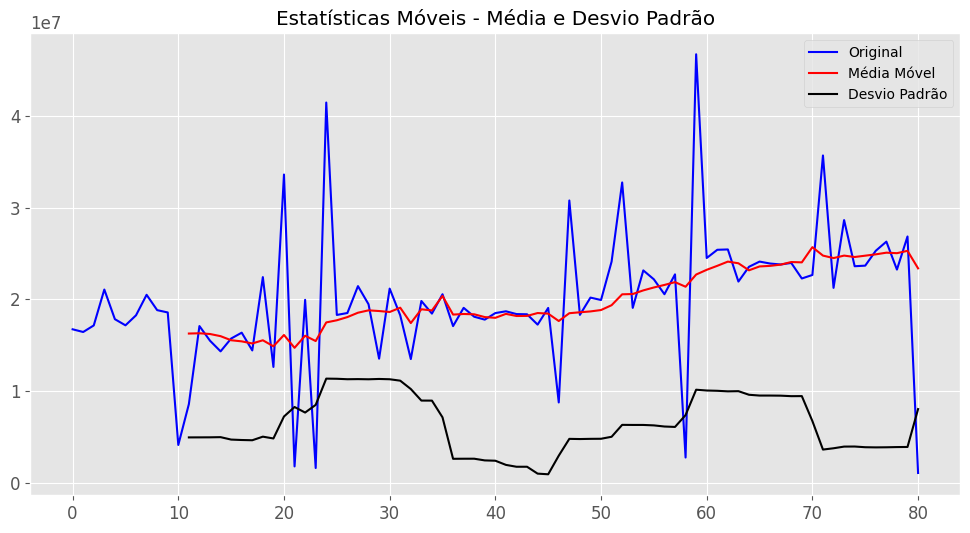

In [501]:
# Plot das estatísticas móveis
plt.figure(figsize = (12, 6))
orig = plt.plot(y, color = 'blue', label = 'Original')
mean = plt.plot(rolmean, color = 'red', label = 'Média Móvel')
std = plt.plot(rolstd, color = 'black', label = 'Desvio Padrão')
plt.legend(loc='best')
plt.title('Estatísticas Móveis - Média e Desvio Padrão')
plt.show()

Checando Crrelação

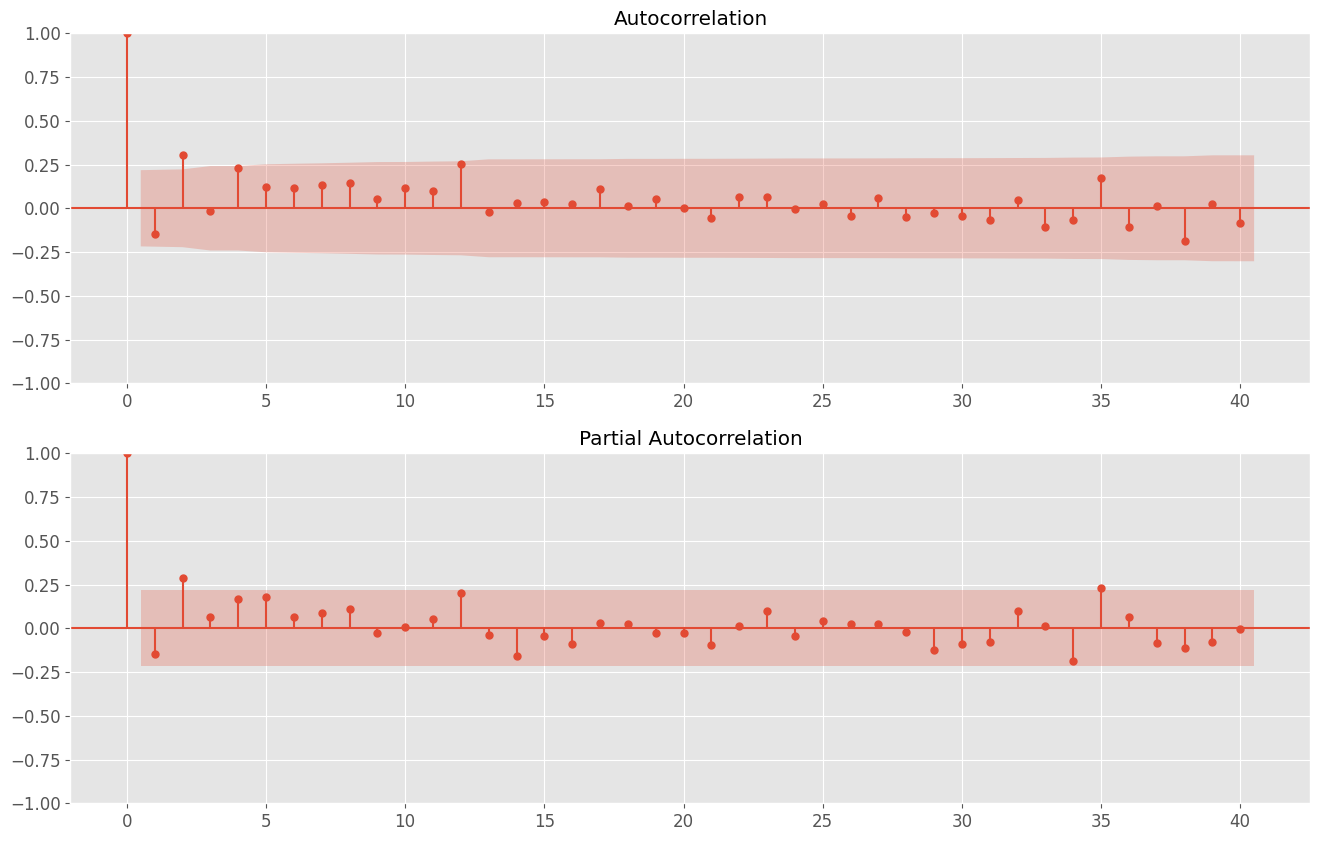

In [502]:
# Plots
plt.rcParams.update({'figure.figsize': (16,10)})

# Plot do gráfico ACF
plt.subplot(211)
plot_acf(dados_serie['VALOR_EMPENHADO'], ax = plt.gca(), lags = 40)

# Plot do gráfico PACF
plt.subplot(212)
plot_pacf(dados_serie['VALOR_EMPENHADO'], ax = plt.gca(), lags = 40, method = 'ywm')
plt.show()

# Teste Dickey-Fuller Aumentado

In [503]:
# Teste Dickey-Fuller

# Print
print('\nResultado do Teste Dickey-Fuller:\n')

# Teste
dfteste = adfuller(dados_serie['VALOR_EMPENHADO'], autolag = 'AIC')

# Formatando a saída
dfsaida = pd.Series(dfteste[0:4], index = ['Estatística do Teste',
                                           'Valor-p',
                                           'Número de Lags Consideradas',
                                           'Número de Observações Usadas'])

# Loop por cada item da saída do teste
for key,value in dfteste[4].items():
    dfsaida['Valor Crítico (%s)'%key] = value

# Print
print (dfsaida)


Resultado do Teste Dickey-Fuller:

Estatística do Teste            -2.206465
Valor-p                          0.203907
Número de Lags Consideradas      4.000000
Número de Observações Usadas    76.000000
Valor Crítico (1%)              -3.519481
Valor Crítico (5%)              -2.900395
Valor Crítico (10%)             -2.587498
dtype: float64


# Automatização para testar estacionaridade

In [504]:
# Função para testar a estacionaridade
def dsa_testa_estacionaridade(serie, window = 12, title = 'Estatísticas Móveis e Teste Dickey-Fuller'):
    """
    Função para testar a estacionaridade de uma série temporal.
    
    Parâmetros:
    - serie: pandas.Series. Série temporal a ser testada.
    - window: int. Janela para cálculo das estatísticas móveis.
    - title: str. Título para os gráficos.
    """
    # Calcula estatísticas móveis
    rolmean = serie.rolling(window = window).mean()
    rolstd = serie.rolling(window = window).std()

    # Plot das estatísticas móveis
    plt.figure(figsize = (14, 6))
    plt.plot(serie, color = 'blue', label = 'Original')
    plt.plot(rolmean, color = 'red', label = 'Média Móvel')
    plt.plot(rolstd, color = 'black', label = 'Desvio Padrão Móvel')
    plt.legend(loc = 'best')
    plt.title(title)
    plt.show(block = False)
    
    # Teste Dickey-Fuller
    print('\nResultado do Teste Dickey-Fuller:')
    dfteste = adfuller(serie, autolag = 'AIC')
    dfsaida = pd.Series(dfteste[0:4], index = ['Estatística do Teste', 
                                               'Valor-p', 
                                               'Número de Lags Consideradas', 
                                               'Número de Observações Usadas'])
    for key, value in dfteste[4].items():
        dfsaida['Valor Crítico (%s)' % key] = value
        
    print(dfsaida)
    
    # Conclusão baseada no valor-p
    if dfsaida['Valor-p'] > 0.05:
        print('\nConclusão:\nO valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.\nEssa série provavelmente não é estacionária.')
    else:
        print('\nConclusão:\nO valor-p é menor que 0.05 e, portanto,temos evidências para rejeitar a hipótese nula.\nEssa série provavelmente é estacionária.')

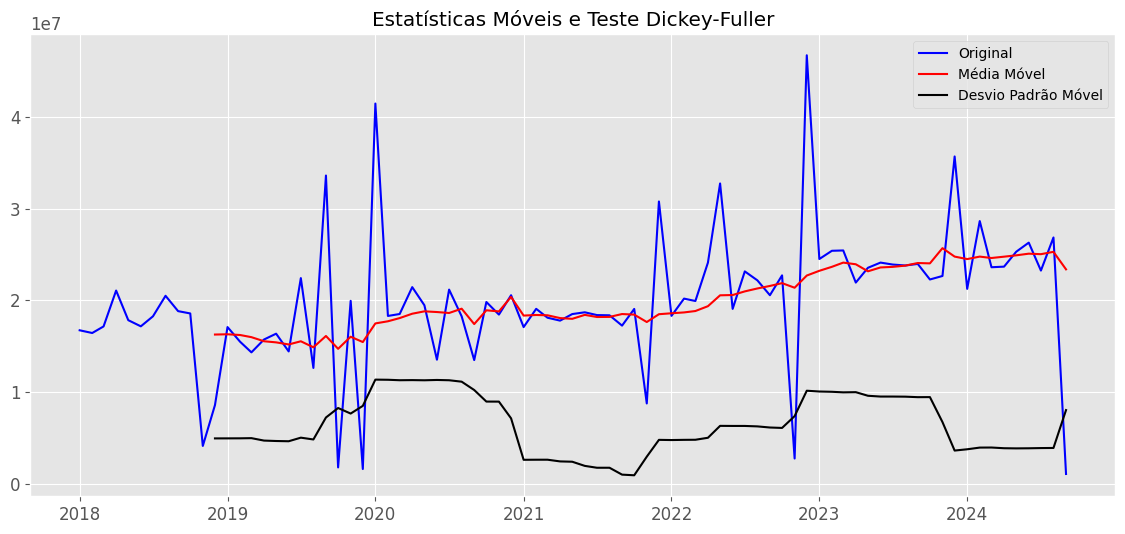


Resultado do Teste Dickey-Fuller:
Estatística do Teste            -2.206465
Valor-p                          0.203907
Número de Lags Consideradas      4.000000
Número de Observações Usadas    76.000000
Valor Crítico (1%)              -3.519481
Valor Crítico (5%)              -2.900395
Valor Crítico (10%)             -2.587498
dtype: float64

Conclusão:
O valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.
Essa série provavelmente não é estacionária.


In [505]:
# Executando nossa função
dsa_testa_estacionaridade(dados_serie)

# Aplicando transformações para tornar a série Estacionária

In [506]:
dados.head()

,ANO_MES,VALOR_EMPENHADO
0,2018-01-01,16724784.45
1,2018-02-01,16429479.75
2,2018-03-01,17145295.26
3,2018-04-01,21059333.10
4,2018-05-01,17827216.50


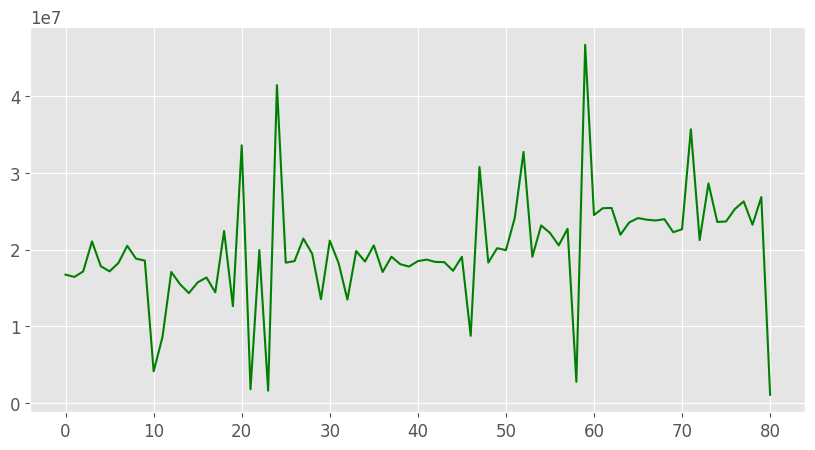

In [507]:
# Plot
plt.figure(figsize = (10, 5))
plt.plot(dados['VALOR_EMPENHADO'], color = "green")
plt.show()

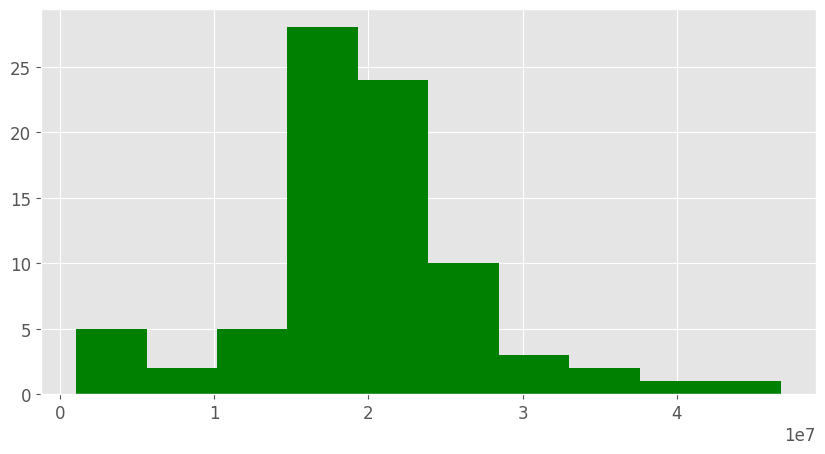

In [508]:
# Histograma
plt.figure(figsize = (10, 5))
plt.hist(dados['VALOR_EMPENHADO'], color = "green")
plt.show()

In [509]:
# Média da série
dados['VALOR_EMPENHADO'].mean()

19949095.6162963

In [510]:
# Desvio Padrão da Série
dados['VALOR_EMPENHADO'].std()

7527234.259312736

# Transformação de LOG

In [511]:
# Vamos aplicar uma transformação de log usando np.log() e gravamos o resultado em uma nova coluna do nosso dataset
dados['VALOR_EMPENHADO_log'] = np.log(dados['VALOR_EMPENHADO'])
dados.head()

,ANO_MES,VALOR_EMPENHADO,VALOR_EMPENHADO_log
0,2018-01-01,16724784.45,16.632402
1,2018-02-01,16429479.75,16.614588
2,2018-03-01,17145295.26,16.657234
3,2018-04-01,21059333.10,16.862854
4,2018-05-01,17827216.50,16.696237


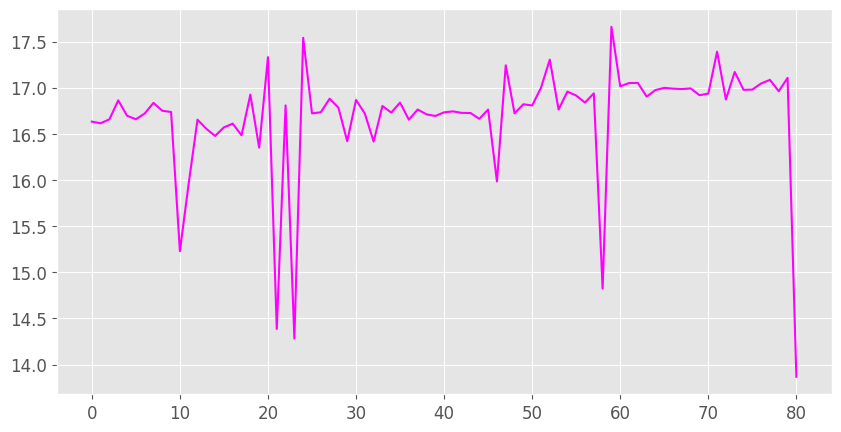

In [512]:
# Plot da série transformada
plt.figure(figsize = (10, 5))
plt.plot(dados['VALOR_EMPENHADO_log'], color = "magenta")
plt.show()

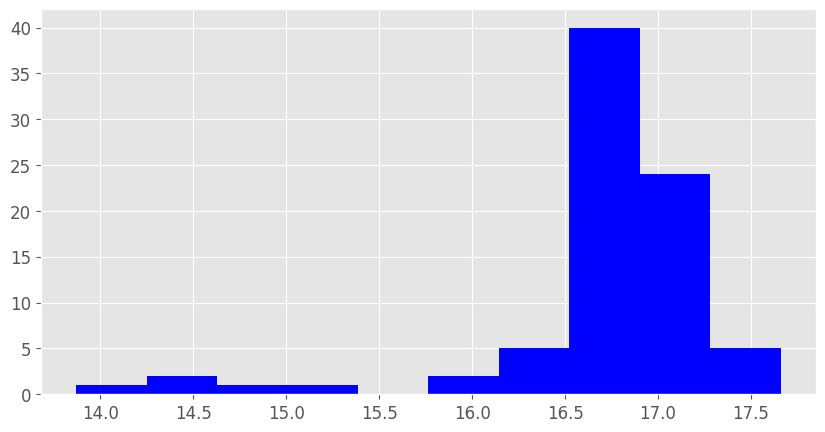

In [513]:
# Histograma da série transformada
plt.figure(figsize = (10, 5))
plt.hist(dados['VALOR_EMPENHADO_log'], color = "blue")
plt.show()

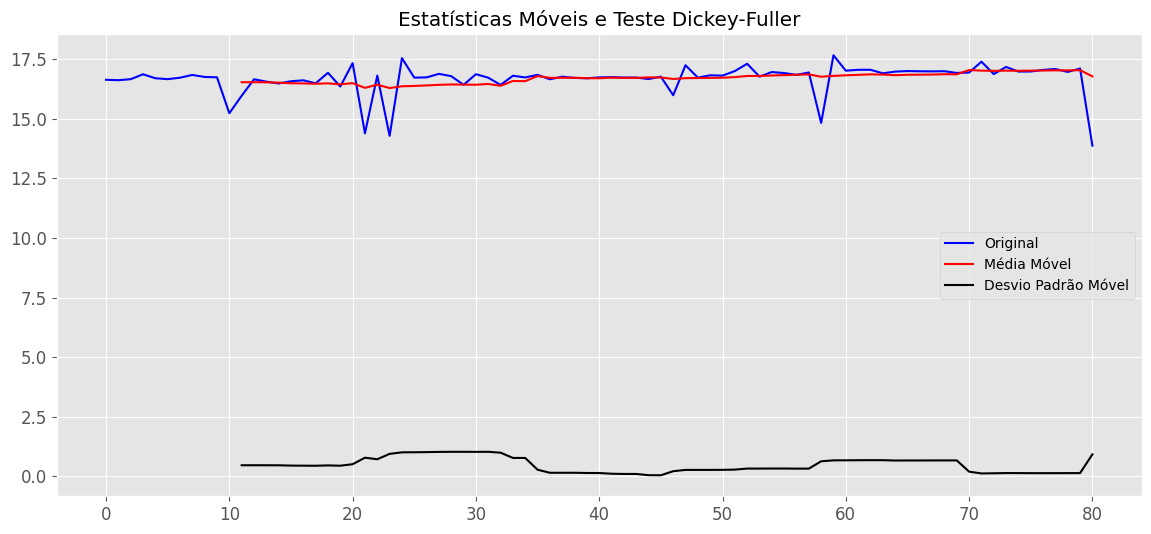


Resultado do Teste Dickey-Fuller:
Estatística do Teste            -4.267111
Valor-p                          0.000506
Número de Lags Consideradas      1.000000
Número de Observações Usadas    79.000000
Valor Crítico (1%)              -3.515977
Valor Crítico (5%)              -2.898886
Valor Crítico (10%)             -2.586694
dtype: float64

Conclusão:
O valor-p é menor que 0.05 e, portanto,temos evidências para rejeitar a hipótese nula.
Essa série provavelmente é estacionária.


In [514]:
# Testando Estacionaridade
dsa_testa_estacionaridade(dados['VALOR_EMPENHADO_log'])

# Transformação da Raiz Quadrada

In [515]:
# Transformação de Raiz Quadrada com np.sqrt()
dados_sqrt = np.sqrt(dados['VALOR_EMPENHADO'])

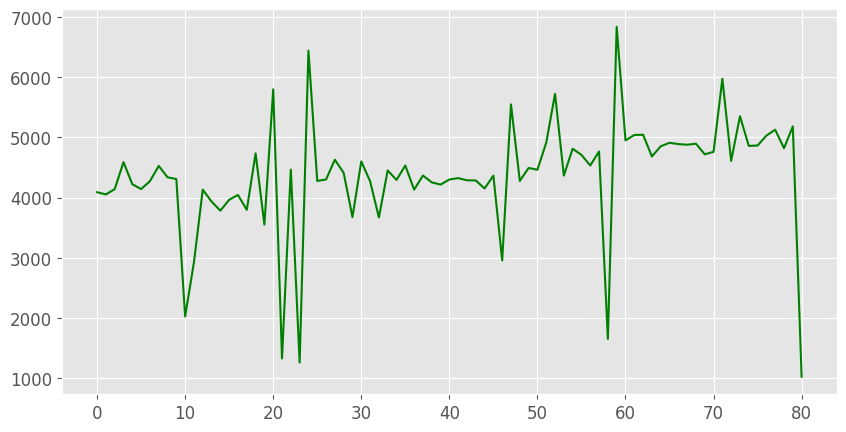

In [516]:
# Gráfico de Linha
plt.figure(figsize = (10, 5))
plt.plot(dados_sqrt, color = "green")
plt.show()

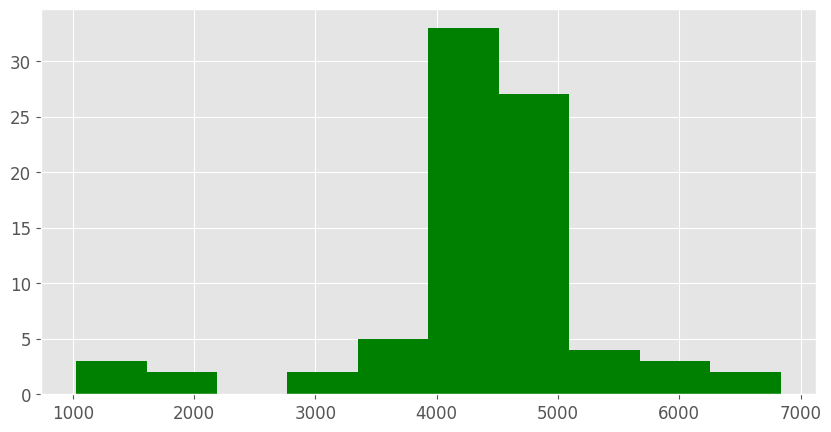

In [517]:
# Histograma
plt.figure(figsize = (10, 5))
plt.hist(dados_sqrt, color = "green")
plt.show()

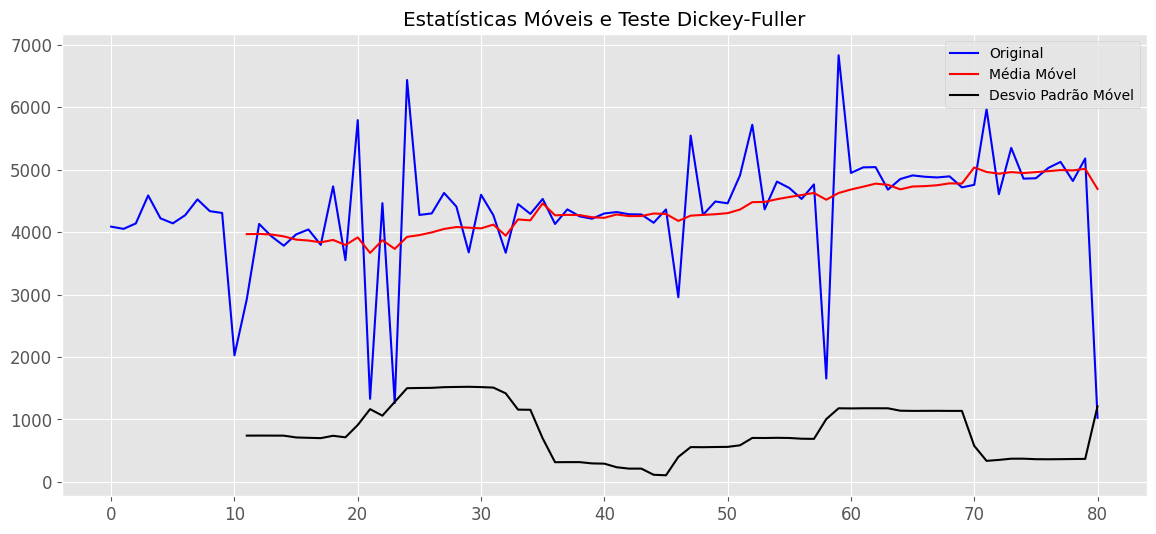


Resultado do Teste Dickey-Fuller:
Estatística do Teste            -4.532801
Valor-p                          0.000171
Número de Lags Consideradas      1.000000
Número de Observações Usadas    79.000000
Valor Crítico (1%)              -3.515977
Valor Crítico (5%)              -2.898886
Valor Crítico (10%)             -2.586694
dtype: float64

Conclusão:
O valor-p é menor que 0.05 e, portanto,temos evidências para rejeitar a hipótese nula.
Essa série provavelmente é estacionária.


In [518]:
dsa_testa_estacionaridade(dados_sqrt)

# Transformação Box-Cox

A transformação de raiz quadrada e a transformação de log pertencem a uma classe de transformações denominadas transformações de potência.

A transformação Box-Cox é um método de transformação de dados configurável que suporta a raiz quadrada e a transformação de log, bem como um conjunto de transformações relacionadas.

Mais do que isso, pode ser configurado para avaliar um conjunto de transformações automaticamente e selecionar o melhor ajuste. A série resultante pode ser mais linear e a distribuição resultante mais gaussiana ou uniforme, dependendo do processo que a gerou.

A biblioteca scipy.stats fornece uma implementação da transformação Box-Cox. A função boxcox() usa um argumento, chamado lambda, que controla o tipo de transformação a ser executada.

Abaixo estão alguns valores comuns para lambda

- lambda = -1. é uma transformação recíproca.
- lambda = -0,5 é uma transformação de raiz quadrada recíproca.
- lambda = 0,0 é uma transformação de log.
- lambda = 0,5 é uma transformação de raiz quadrada.
- lambda = 1.0 não é transformação.

Vamos ao exemplo:

In [519]:
# Aplicando Transformação Box-Cox
dados['VALOR_EMPENHADO_box'] = boxcox(dados['VALOR_EMPENHADO'], lmbda = 0.0)

In [520]:
dados.head()

,ANO_MES,VALOR_EMPENHADO,VALOR_EMPENHADO_log,VALOR_EMPENHADO_box
0,2018-01-01,16724784.45,16.632402,16.632402
1,2018-02-01,16429479.75,16.614588,16.614588
2,2018-03-01,17145295.26,16.657234,16.657234
3,2018-04-01,21059333.10,16.862854,16.862854
4,2018-05-01,17827216.50,16.696237,16.696237


### Buscando o valor ideal de Lambda

In [521]:
# Aplicando Transformação Box-Cox
dados['VALOR_EMPENHADO_box_2'], lam_value = boxcox(dados['VALOR_EMPENHADO'])
print('Valor Ideal de Lambda: %f' % lam_value)
dados.head()

Valor Ideal de Lambda: 0.981043


,ANO_MES,VALOR_EMPENHADO,VALOR_EMPENHADO_log,VALOR_EMPENHADO_box,VALOR_EMPENHADO_box_2
0,2018-01-01,16724784.45,16.632402,16.632402,1.243760e+07
1,2018-02-01,16429479.75,16.614588,16.614588,1.222212e+07
2,2018-03-01,17145295.26,16.657234,16.657234,1.274431e+07
3,2018-04-01,21059333.10,16.862854,16.862854,1.559277e+07
4,2018-05-01,17827216.50,16.696237,16.696237,1.324140e+07


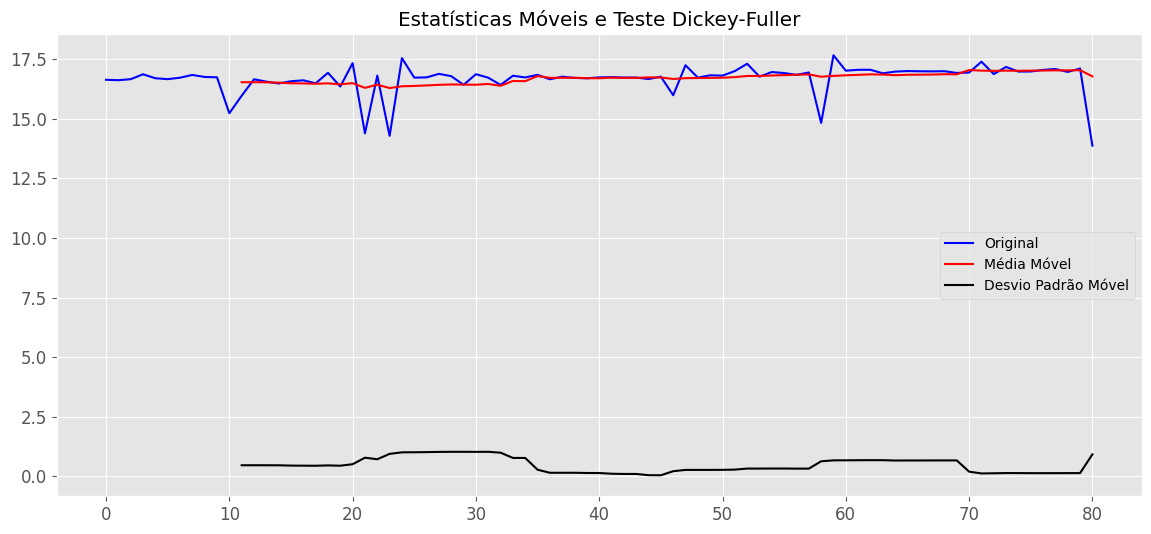


Resultado do Teste Dickey-Fuller:
Estatística do Teste            -4.267111
Valor-p                          0.000506
Número de Lags Consideradas      1.000000
Número de Observações Usadas    79.000000
Valor Crítico (1%)              -3.515977
Valor Crítico (5%)              -2.898886
Valor Crítico (10%)             -2.586694
dtype: float64

Conclusão:
O valor-p é menor que 0.05 e, portanto,temos evidências para rejeitar a hipótese nula.
Essa série provavelmente é estacionária.


In [522]:
dsa_testa_estacionaridade(dados['VALOR_EMPENHADO_box'])

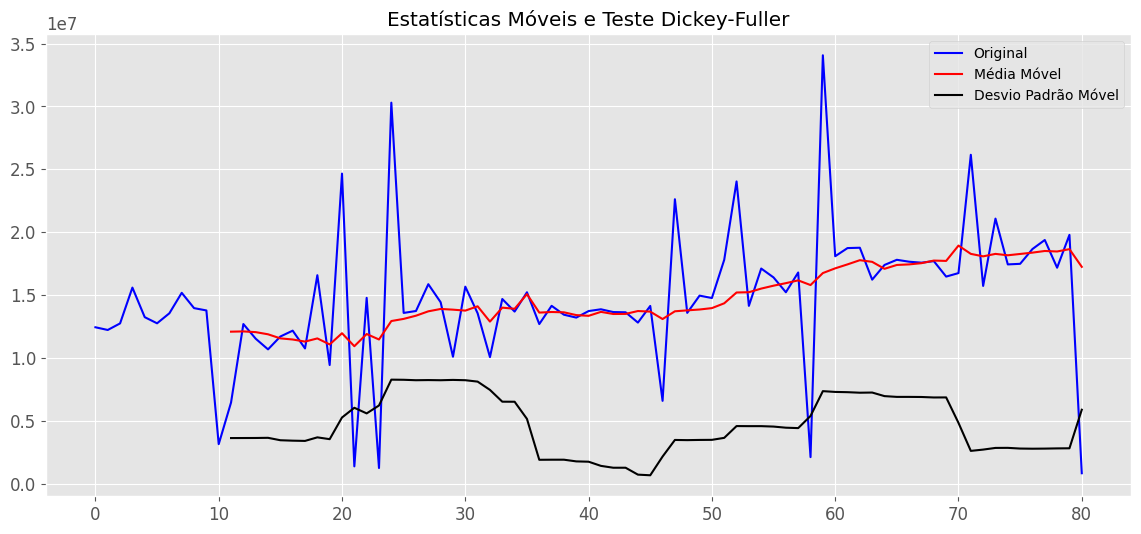


Resultado do Teste Dickey-Fuller:
Estatística do Teste            -2.212742
Valor-p                          0.201653
Número de Lags Consideradas      4.000000
Número de Observações Usadas    76.000000
Valor Crítico (1%)              -3.519481
Valor Crítico (5%)              -2.900395
Valor Crítico (10%)             -2.587498
dtype: float64

Conclusão:
O valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.
Essa série provavelmente não é estacionária.


In [523]:
dsa_testa_estacionaridade(dados['VALOR_EMPENHADO_box_2'])

# Técnicas mais avançadas para torna-lá Estacionária

In [524]:
dados.head()

,ANO_MES,VALOR_EMPENHADO,VALOR_EMPENHADO_log,VALOR_EMPENHADO_box,VALOR_EMPENHADO_box_2
0,2018-01-01,16724784.45,16.632402,16.632402,1.243760e+07
1,2018-02-01,16429479.75,16.614588,16.614588,1.222212e+07
2,2018-03-01,17145295.26,16.657234,16.657234,1.274431e+07
3,2018-04-01,21059333.10,16.862854,16.862854,1.559277e+07
4,2018-05-01,17827216.50,16.696237,16.696237,1.324140e+07


In [525]:
dados_serie

,VALOR_EMPENHADO
ANO_MES,
2018-01-01,16724784.45
2018-02-01,16429479.75
2018-03-01,17145295.26
2018-04-01,21059333.10
2018-05-01,17827216.50
...,...
2024-05-01,25290610.90
2024-06-01,26284898.03
2024-07-01,23237870.99


# Suavicação Através da Média Móvel Simples
 Calculamos a média de valores 'k' consecutivos, dependendo da frequência da série temporal.
- Aqui podemos calcular a média do último 1 ano, ou seja, os últimos 12 valores.
- Uma desvantagem dessa abordagem específica é que o período de tempo deve ser estritamente definido.

In [526]:
# Primeiro, vamos calcular a média da série (essa não é a média móvel, mas sim a média total)
dados.mean()

ANO_MES                  2021-05-01 15:06:40
VALOR_EMPENHADO              19949095.616296
VALOR_EMPENHADO_log                16.684625
VALOR_EMPENHADO_box                16.684625
VALOR_EMPENHADO_box_2         14763631.76859
dtype: object

In [527]:
# Vamos criar uma cópia da série original pois isso será importante mais tarde
df_serie = dados.copy()

In [528]:
# Vamos criar uma cópia da série original pois isso será importante mais tarde
df_serie_serie = dados_serie.copy()

In [529]:
type(dados)

pandas.core.frame.DataFrame

In [530]:
type(dados_serie)

pandas.core.frame.DataFrame

In [531]:
# Agora definimos uma janela de 12 meses da série temporal para calcular a média móvel
# Vamos gravar o resultado em outra coluna no próprio dataset
dados_serie['VALOR_EMPENHADO_media_movel_simples'] = dados_serie.rolling(window = 12).mean()

In [532]:
dados_serie

,VALOR_EMPENHADO,VALOR_EMPENHADO_media_movel_simples
ANO_MES,,
2018-01-01,16724784.45,NaN
2018-02-01,16429479.75,NaN
2018-03-01,17145295.26,NaN
2018-04-01,21059333.10,NaN
2018-05-01,17827216.50,NaN
...,...,...
2024-05-01,25290610.90,2.489946e+07
2024-06-01,26284898.03,2.508086e+07
2024-07-01,23237870.99,2.502593e+07


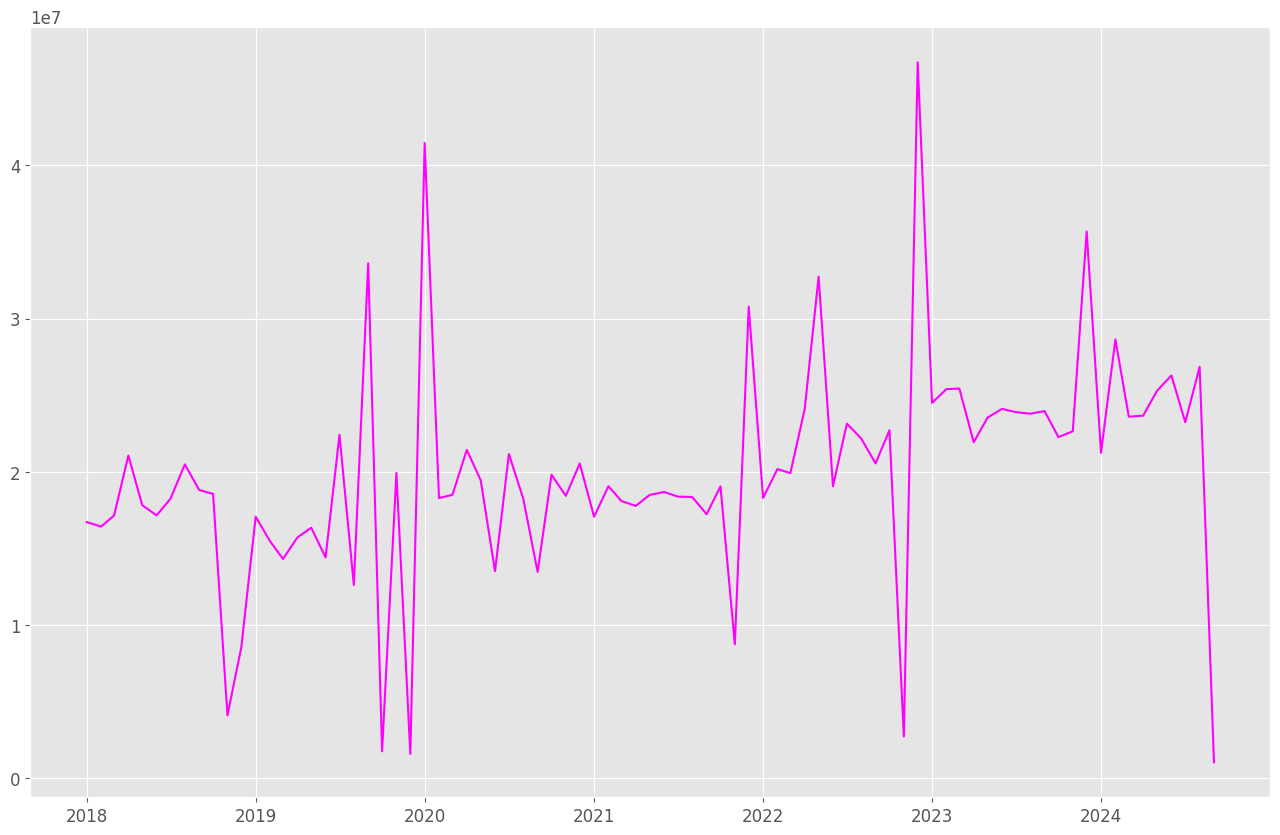

In [533]:
# Plot da série original
plt.plot(dados_serie['VALOR_EMPENHADO'], color = 'magenta')
plt.show();

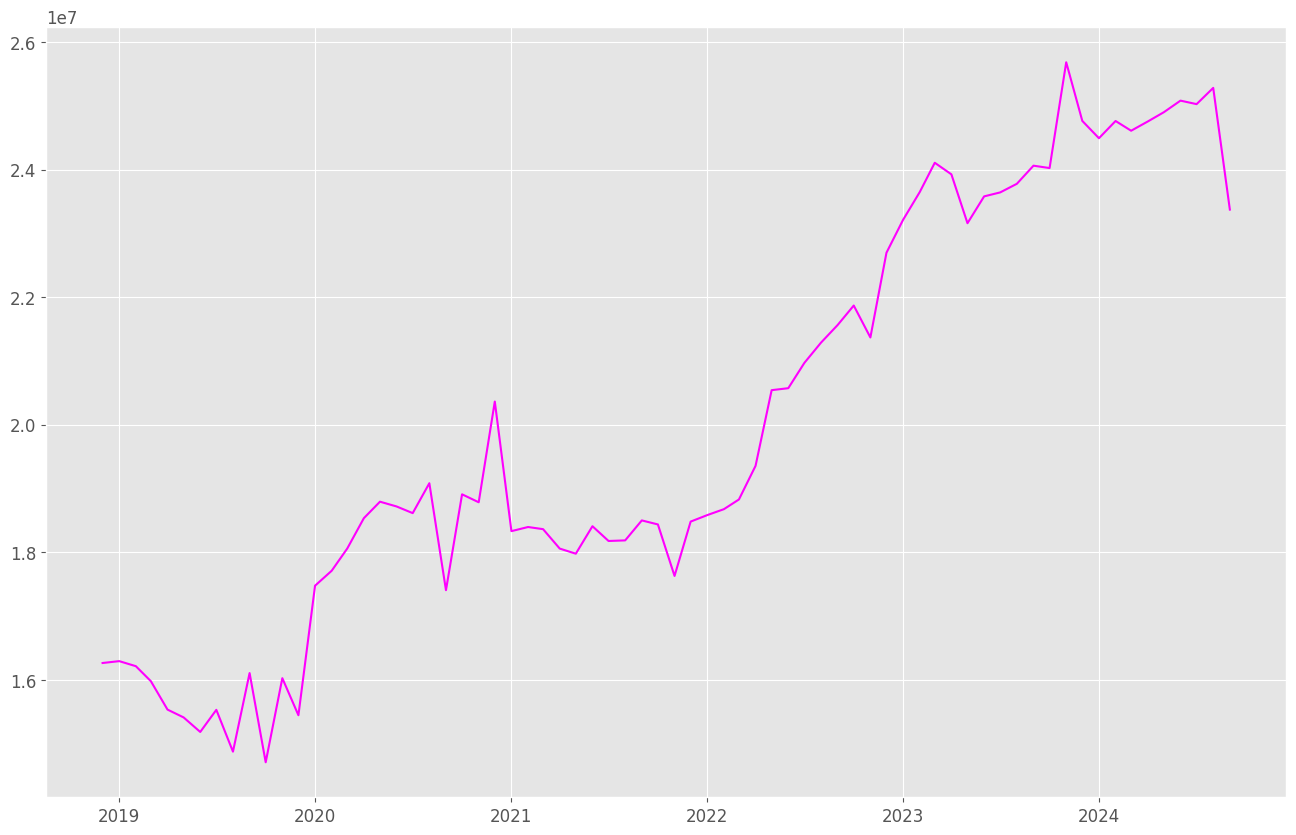

In [534]:
# Plot da série original
plt.plot(dados_serie['VALOR_EMPENHADO_media_movel_simples'], color = 'magenta')
plt.show();

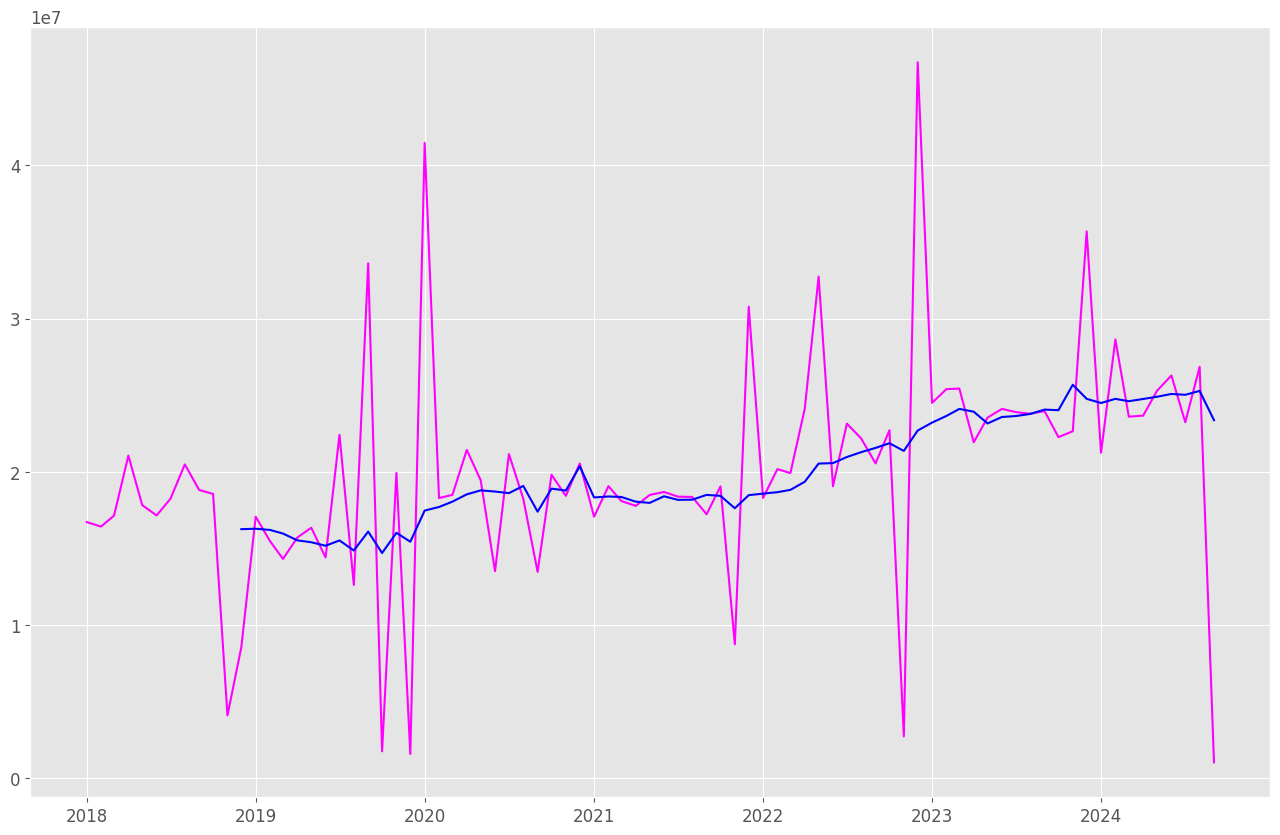

In [535]:
plt.plot(dados_serie['VALOR_EMPENHADO'], color = 'magenta')
plt.plot(dados_serie['VALOR_EMPENHADO_media_movel_simples'], color = 'blue')
plt.show();

In [536]:
# Removendo a tendencia

In [537]:
# Calculando a diferença entre a série original e a série suavizada
diff_original_suavizada = dados_serie['VALOR_EMPENHADO'] - dados_serie['VALOR_EMPENHADO_media_movel_simples']
diff_original_suavizada.tail(20)

ANO_MES
2023-02-01    1.748383e+06
2023-03-01    1.325933e+06
2023-04-01   -1.995388e+06
2023-05-01    3.829171e+05
2023-06-01    5.288926e+05
2023-07-01    2.553572e+05
2023-08-01    1.500152e+04
2023-09-01   -9.894779e+04
2023-10-01   -1.757758e+06
2023-11-01   -3.033327e+06
2023-12-01    1.091949e+07
2024-01-01   -3.248175e+06
2024-02-01    3.875161e+06
2024-03-01   -1.007383e+06
2024-04-01   -1.087610e+06
2024-05-01    3.911479e+05
2024-06-01    1.204035e+06
2024-07-01   -1.788062e+06
2024-08-01    1.567592e+06
2024-09-01   -2.231722e+07
dtype: float64

In [538]:
# Vamos remover os valores NA para testar a estacionaridade
diff_original_suavizada.dropna(inplace = True)

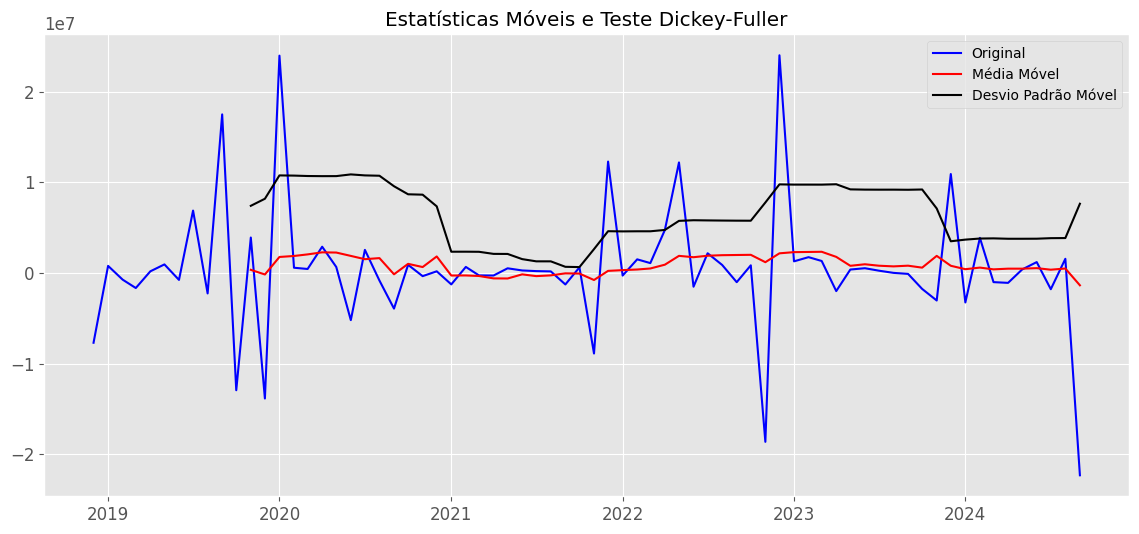


Resultado do Teste Dickey-Fuller:
Estatística do Teste           -1.250928e+01
Valor-p                         2.696729e-23
Número de Lags Consideradas     0.000000e+00
Número de Observações Usadas    6.900000e+01
Valor Crítico (1%)             -3.528890e+00
Valor Crítico (5%)             -2.904440e+00
Valor Crítico (10%)            -2.589656e+00
dtype: float64

Conclusão:
O valor-p é menor que 0.05 e, portanto,temos evidências para rejeitar a hipótese nula.
Essa série provavelmente é estacionária.


In [539]:
# Executando o teste de estacionaridade
dsa_testa_estacionaridade(diff_original_suavizada)

# Suavização Atráves da Média Móvel Ponderada Exponencial


- Para superar o problema de escolher uma janela definida na média móvel, podemos usar a média móvel ponderada exponencial.
- Adotamos uma "média móvel ponderada", em que valores mais recentes recebem um peso maior.
- Pode haver muitas técnicas para atribuir pesos. Uma popular é a média móvel ponderada exponencialmente em que os pesos são atribuídos a todos os valores anteriores com um fator de redução.

A função ewm() do Pandas permite aplicar esse método com facilidade.

In [540]:
# Aplicando suavização exponencial
# Observe que estamos aplicando a suavização à série original (antes de aplicar a suavização anterior)
serie_suavizada_exp = df_serie_serie.ewm(alpha = 0.2, adjust = True).mean()

In [541]:
serie_suavizada_exp

,VALOR_EMPENHADO
ANO_MES,
2018-01-01,1.672478e+07
2018-02-01,1.656073e+07
2018-03-01,1.680030e+07
2018-04-01,1.824306e+07
2018-05-01,1.811936e+07
...,...
2024-05-01,2.501174e+07
2024-06-01,2.526637e+07
2024-07-01,2.486067e+07


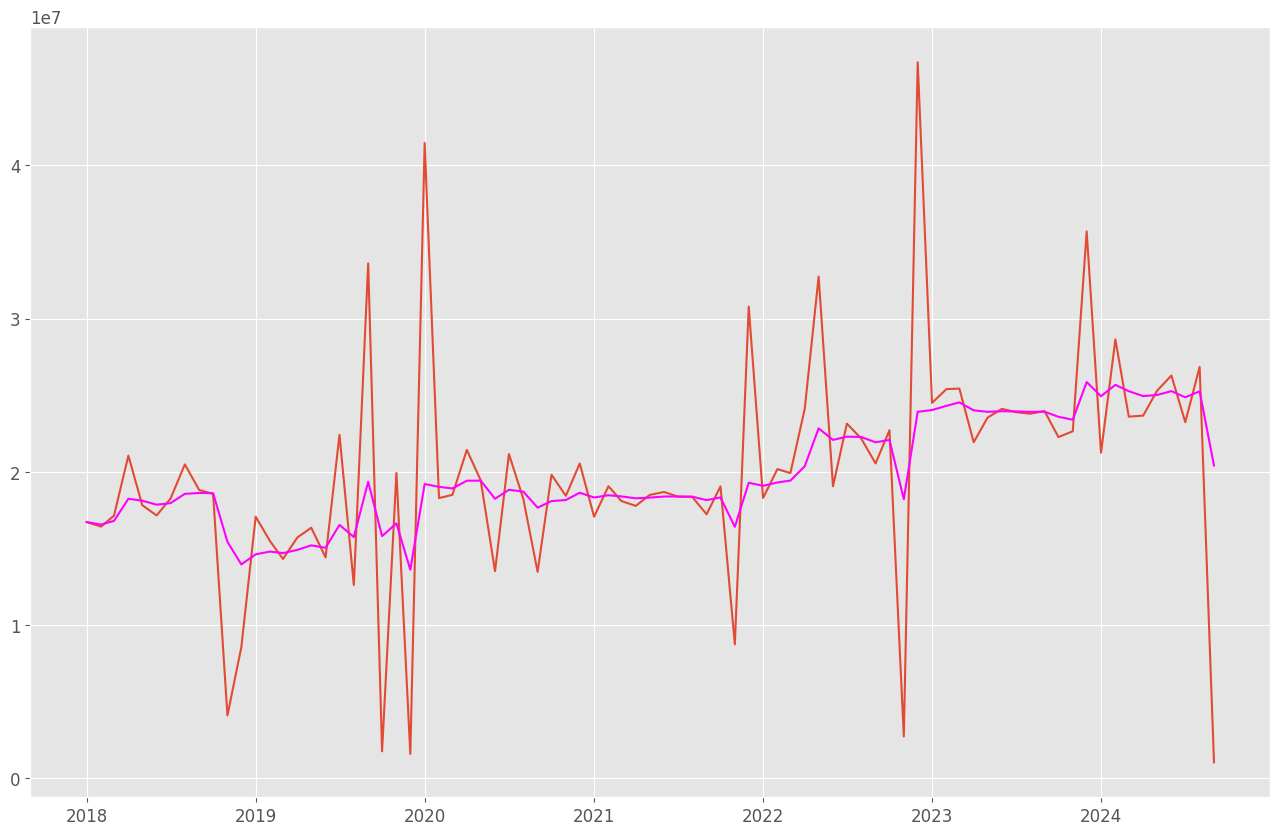

In [542]:
# Plt das séries
plt.plot(df_serie_serie)
plt.plot(serie_suavizada_exp, color = 'magenta')
plt.show();

In [543]:
# Diferença
diff_original_suav_exp = df_serie_serie['VALOR_EMPENHADO'] - serie_suavizada_exp['VALOR_EMPENHADO']

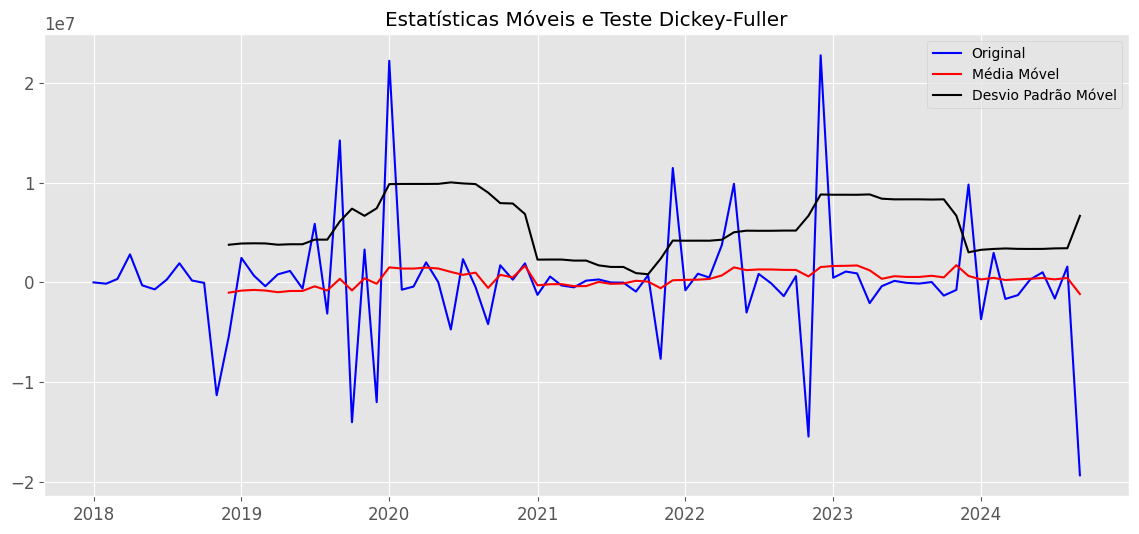


Resultado do Teste Dickey-Fuller:
Estatística do Teste           -1.320942e+01
Valor-p                         1.054479e-24
Número de Lags Consideradas     0.000000e+00
Número de Observações Usadas    8.000000e+01
Valor Crítico (1%)             -3.514869e+00
Valor Crítico (5%)             -2.898409e+00
Valor Crítico (10%)            -2.586439e+00
dtype: float64

Conclusão:
O valor-p é menor que 0.05 e, portanto,temos evidências para rejeitar a hipótese nula.
Essa série provavelmente é estacionária.


In [544]:
# Executando o teste de estacionaridade
dsa_testa_estacionaridade(diff_original_suav_exp)

# Diferenciação
Vamos primeiro colocar os dados na mesma escala com a transformação de log e em seguida aplicar a diferenciação.

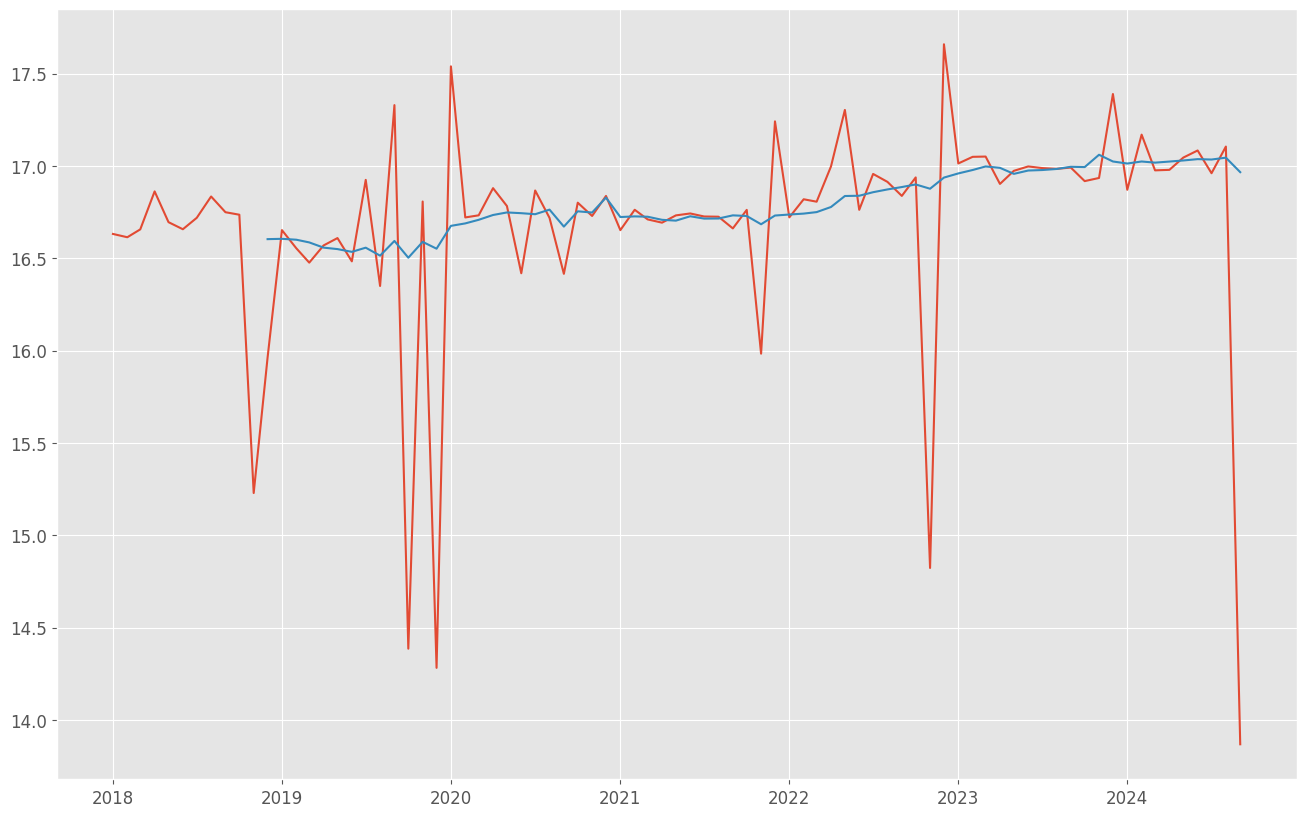

In [545]:
# Transformação de log
dados_serie_log = np.log(dados_serie)
plt.plot(dados_serie_log)

In [546]:
dados_serie_log.head()

,VALOR_EMPENHADO,VALOR_EMPENHADO_media_movel_simples
ANO_MES,,
2018-01-01,16.632402,NaN
2018-02-01,16.614588,NaN
2018-03-01,16.657234,NaN
2018-04-01,16.862854,NaN
2018-05-01,16.696237,NaN


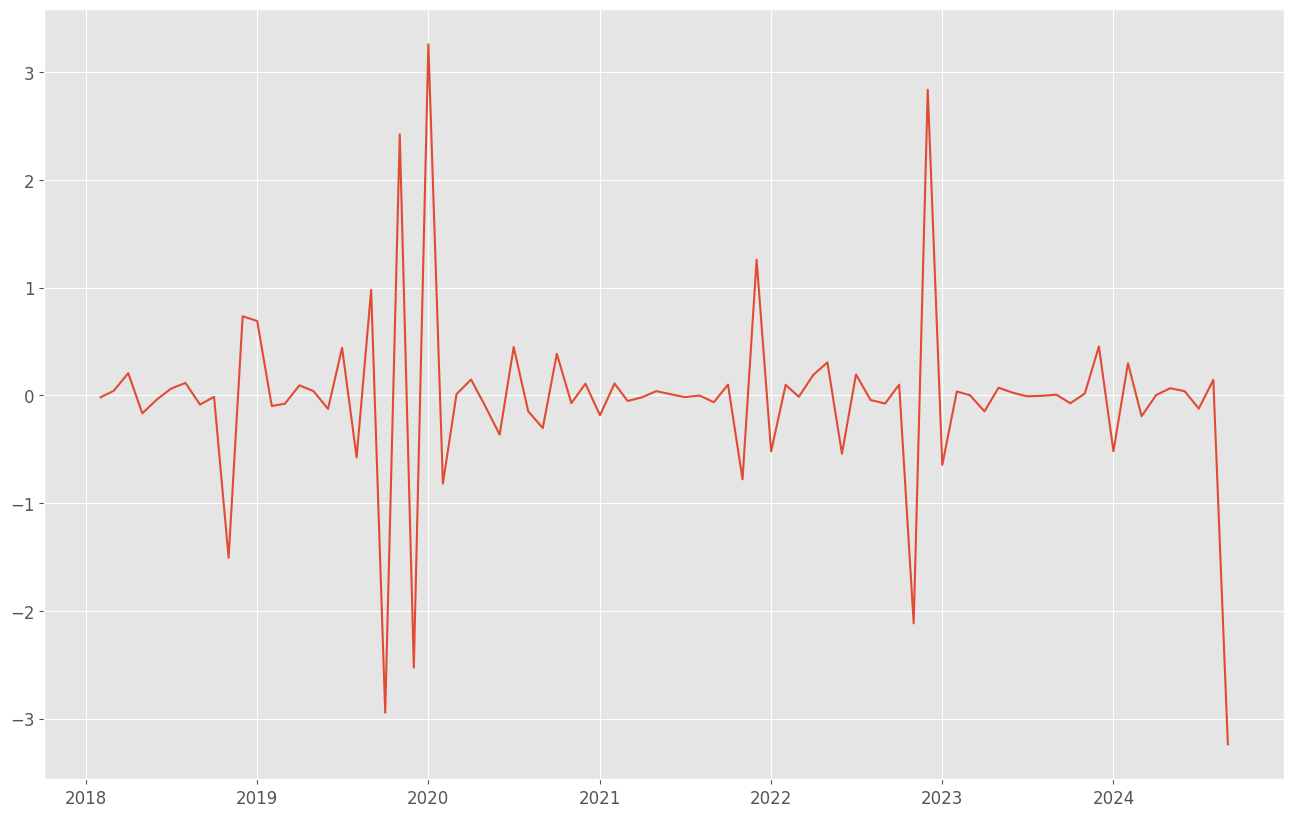

In [547]:
# Diferenciação Para Remover Tendência - Exemplo 1
# O método shift() move os dados em uma unidade
# Observe que estamos usando a série com transformação de log já aplicada
dados_serie_diff1 = dados_serie_log['VALOR_EMPENHADO'] - dados_serie_log['VALOR_EMPENHADO'].shift()
plt.plot(dados_serie_diff1)
plt.show();

In [548]:
# Converte em dataframe, a lista gerada ao aplicar a diferenciação
dados_serie_diff1_df = pd.DataFrame(dados_serie_diff1) 

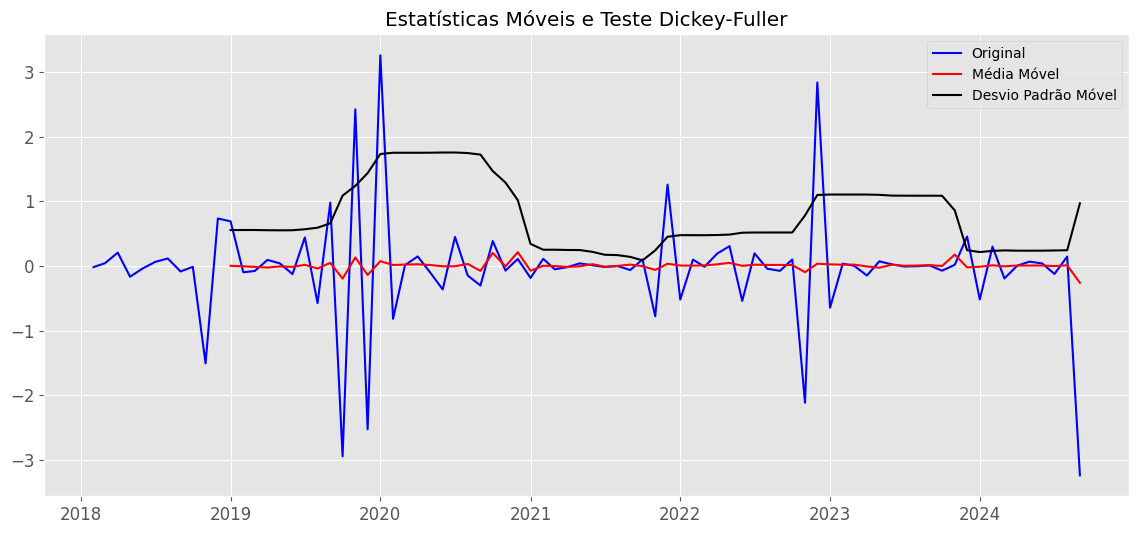


Resultado do Teste Dickey-Fuller:


MissingDataError: exog contains inf or nans

In [549]:
# Vamos testar a estacionaridade da série após a diferenciação para remover a tendência
# Como os 2 exemplos anteriores geram o mesmo resultado, vamos usar o segundo
dsa_testa_estacionaridade(dados_serie_diff1_df)

# Modelando!